# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [1]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice
Target path is:
  data_Probabilistic_Reward_Airpuff_Choice/
Searching for Aragorn for 231106
  Moving : 231106_Aragorn_choice.h5
  Moved  : 231106_Aragorn_choice.h5
  Total number of files moved: 1
Fractal folder is: 20231106
^C


In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Total Files  : 143
  Monkey: Bear
    Number of Bear Files : 58
    Earliest Date    : 230608
    Most Recent Date : 231101
  Monkey: Aragorn
    Number of Aragorn Files : 71
    Earliest Date    : 230523
    Most Recent Date : 231102
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 135 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [3]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-11-02' #@param {type:"date"}
end_date = '2023-11-02' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  231102_Aragorn_choice.h5 - Completed
Converting .h5 to python:
  <HDF5 file "231102_Aragorn_choice.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 613
  Choice task detected.
Parsing session data...


  0%|          | 0/613 [00:00<?, ?it/s]

  Complete.
    Correct trials: 400
    Errored trials: 213
    Session Length:  01:55:39
Parsing camera data...
  No camera data attached to ML file.
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-25.883,-48.508)
  Max Values (X,Y): (109.959,128.244)
  Reward Mag: 1.0
    Reward Drops: 12.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.5
    Reward Drops: 4.0
    Reward Frequency: 1.0
    Reward Length: 150.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...


/Users/rahimhashim/Desktop/Monkey-Emotions/config/add_fields.py:335: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Choice
  Pickling 231102_Aragorn_Probabilistic_Reward_Airpuff_5x2_behave.pkl
  Total time to pickle: 1.0113 sec
Looking for images from: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/_fractals/20231102
 Saving figures to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20231102_aragorn
  _fractals.png saved.
Save folder for combined dates: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/figures/20231102_aragorn
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name_1', 'x_1_pos

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [4]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num  subject  trial_num  block  condition  correct  error   
1  231102            0  Aragorn          2      1          1        1      0  \
2  231102            0  Aragorn          3      1          1        1      0   
5  231102            0  Aragorn          6      1          1        1      0   
6  231102            0  Aragorn          7      1          1        1      0   
7  231102            0  Aragorn          8      1          1        1      0   

   error_type                            behavioral_code_markers   
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
6           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
7           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
1  [1464.2930999980308, 1587.3482000024524, 1637....     _fractal_B   [0.0]  \
2  [1498.7381000100868, 1600.5755000078352, 1633....     _fractal_A   [0.0]   
5  [1464.627000008477, 1533.9052000053925, 1566.6...     _fractal_B   [0.0]   
6  [1499.5295999979135, 1573.633299994981, 1607.7...     _fractal_D   [0.0]   
7  [1499.592299995129, 1585.4339999932563, 1618.7...     _fractal_C   [0.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
1   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0  \
2   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
5   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0   
6   [0.0]     _fractal_D   [0.0]   [0.0]         0            0.0   
7   [0.0]     _fractal_C   [0.0]   [0.0]         0            0.0   

   reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
1           0.5             4.0            150.0         0            0.0  \
2           1.0            12.0            200.0         0            0.0   
5           0.5             4.0            150.0         0            0.0   
6           0.0             0.0              0.0         0            0.0   
7           0.0             0.0              0.0         0            0.0   

   reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
1           0.0          0             0.0            0.0          0  \
2           0.0          0             0.0            0.0          0   
5           0.0          0             0.0            0.0          0   
6           0.0          1             1.0            1.0          0   
7           0.0          1             1.0            0.5          0   

   airpuff_prob_2  airpuff_mag_2   
1             0.0            0.0  \
2             0.0            0.0   
5             0.0            0.0   
6             0.0            0.0   
7             0.0            0.0   

                                               eye_x   
1  [-24.338431708438744, -24.338229548443103, -24...  \
2  [-2.77589073986166, -2.7760951276255317, -2.77...   
5  [-23.29466078094455, -23.2897563276704, -23.28...   
6  [109.95902551467448, 109.95902551467448, 109.9...   
7  [9.240269064878962, 9.240269064878962, 9.24026...   

                                               eye_y   
1  [7.150470108506266, 7.159562857766787, 7.15911...  \
2  [-21.000134281454855, -21.02369502499652, -21....   
5  [-14.760330185294936, -14.737210136308066, -14...   
6  [128.24361493500257, 128.24361493500257, 128.2...   
7  [14.577321912625285, 14.577321912625285, 14.57...   

                                           eye_pupil   
1  [6260.0, 6260.0, 6259.0, 6259.0, 6261.0, 6261....  \
2  [8278.0, 8280.0, 8280.0, 8282.0, 8282.0, 8286....   
5  [7425.0, 7428.0, 7428.0, 7431.0, 7431.0, 7435....   
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
7  [6862.0, 6862.0, 6868.0, 6868.0, 6866.0, 6866....   

                                                lick   
1  [0.0032938997379372836, 0.0088839625751055

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

231102
  perf_by_fractal.png saved.


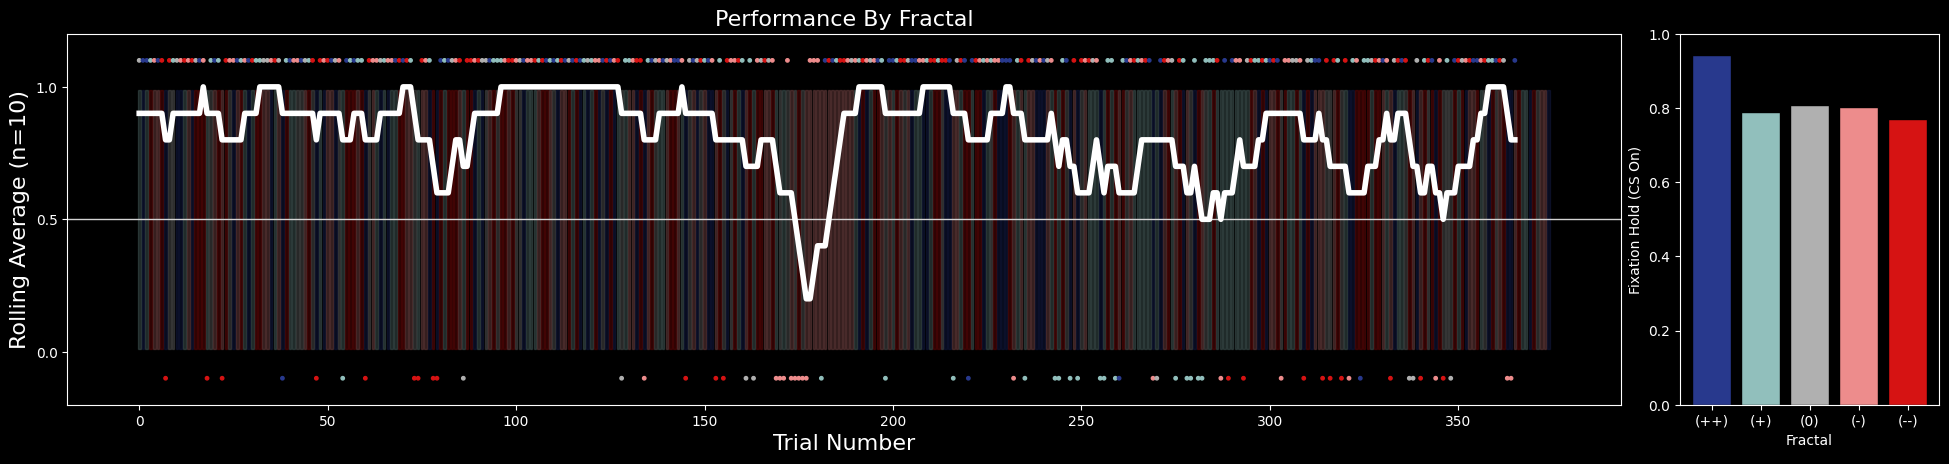

  session_latency.png saved.


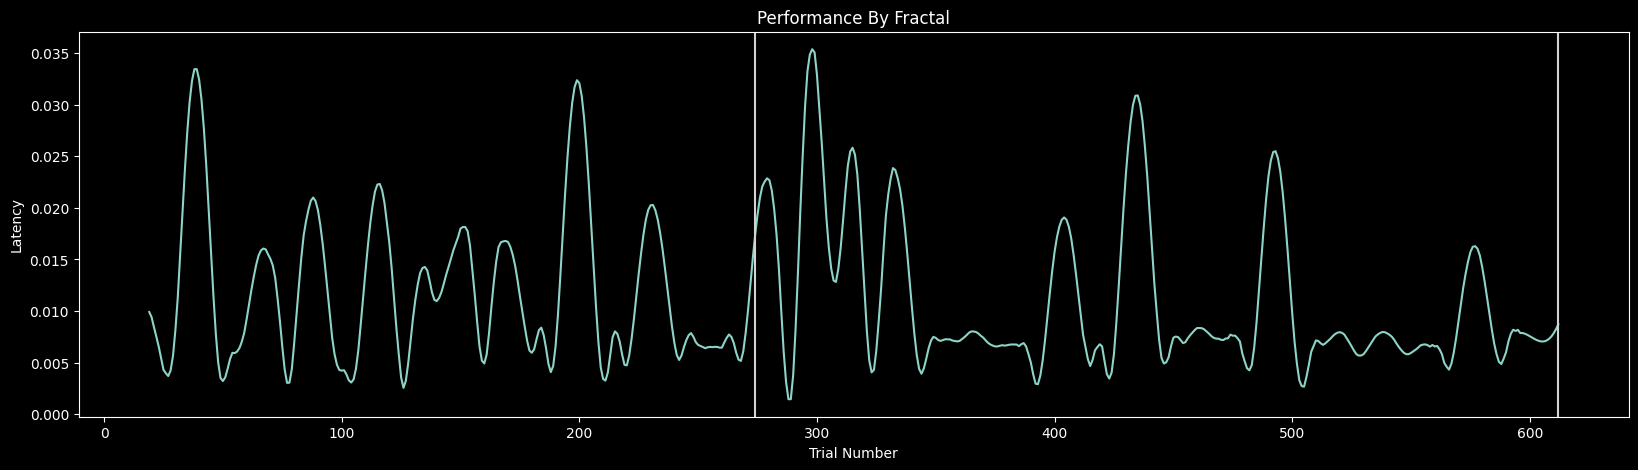

  epoch_hist.png saved.


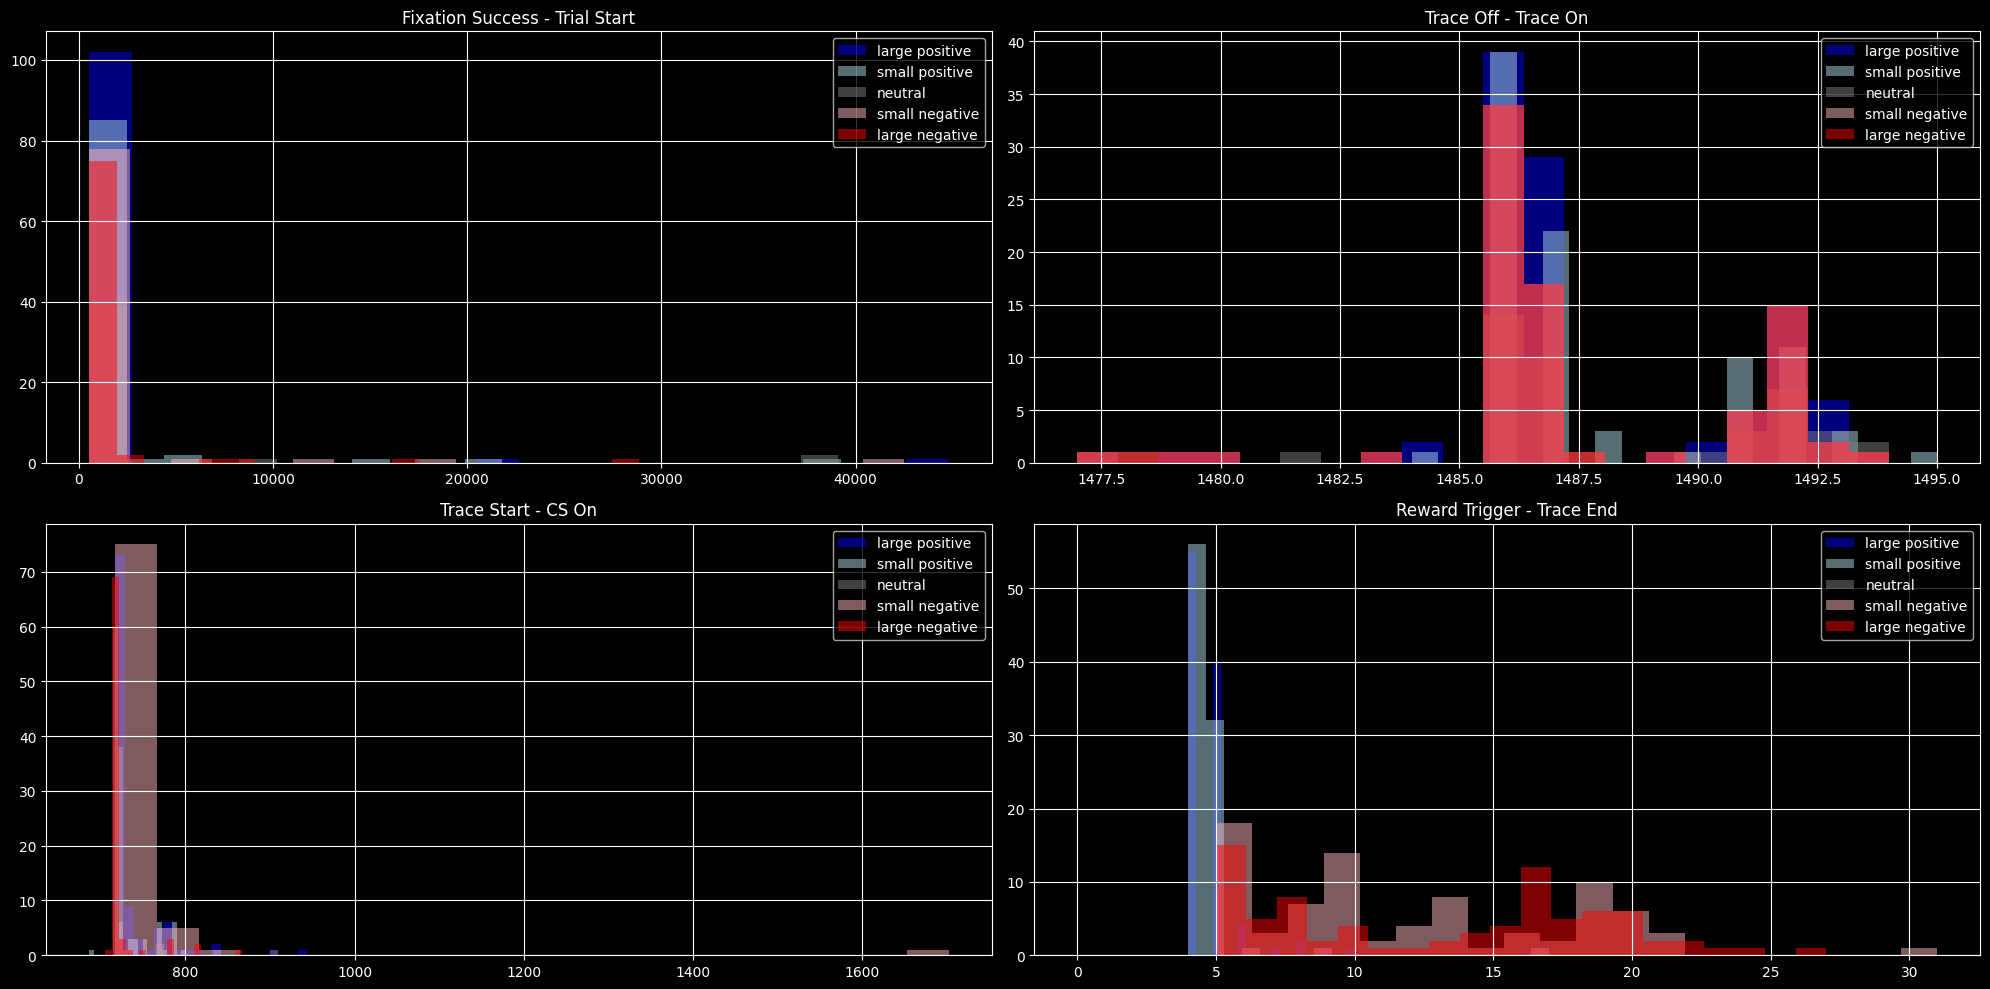

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.378 | Blink Correlation: 0.167
  Valence 0.5: Lick Correlation: -0.129 | Blink Correlation: 0.07
  Valence 0.0: Lick Correlation: -0.198 | Blink Correlation: -0.185
  Valence -0.5: Lick Correlation: -0.269 | Blink Correlation: -0.108
  Valence -1.0: Lick Correlation: -0.334 | Blink Correlation: -0.217
Block: 2
  Valence 1.0: Lick Correlation: -0.544 | Blink Correlation: 0.088
  Valence 0.5: Lick Correlation: -0.069 | Blink Correlation: -0.285
  Valence 0.0: Lick Correlation: 0.184 | Blink Correlation: 0.151
  Valence -0.5: Lick Correlation: -0.097 | Blink Correlation: -0.258
  Valence -1.0: Lick Correlation: -0.067 | Blink Correlation: 0.078


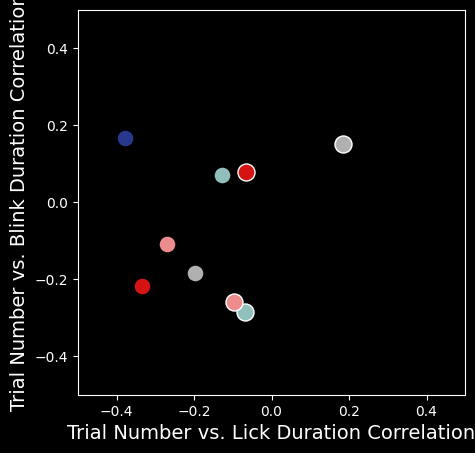

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


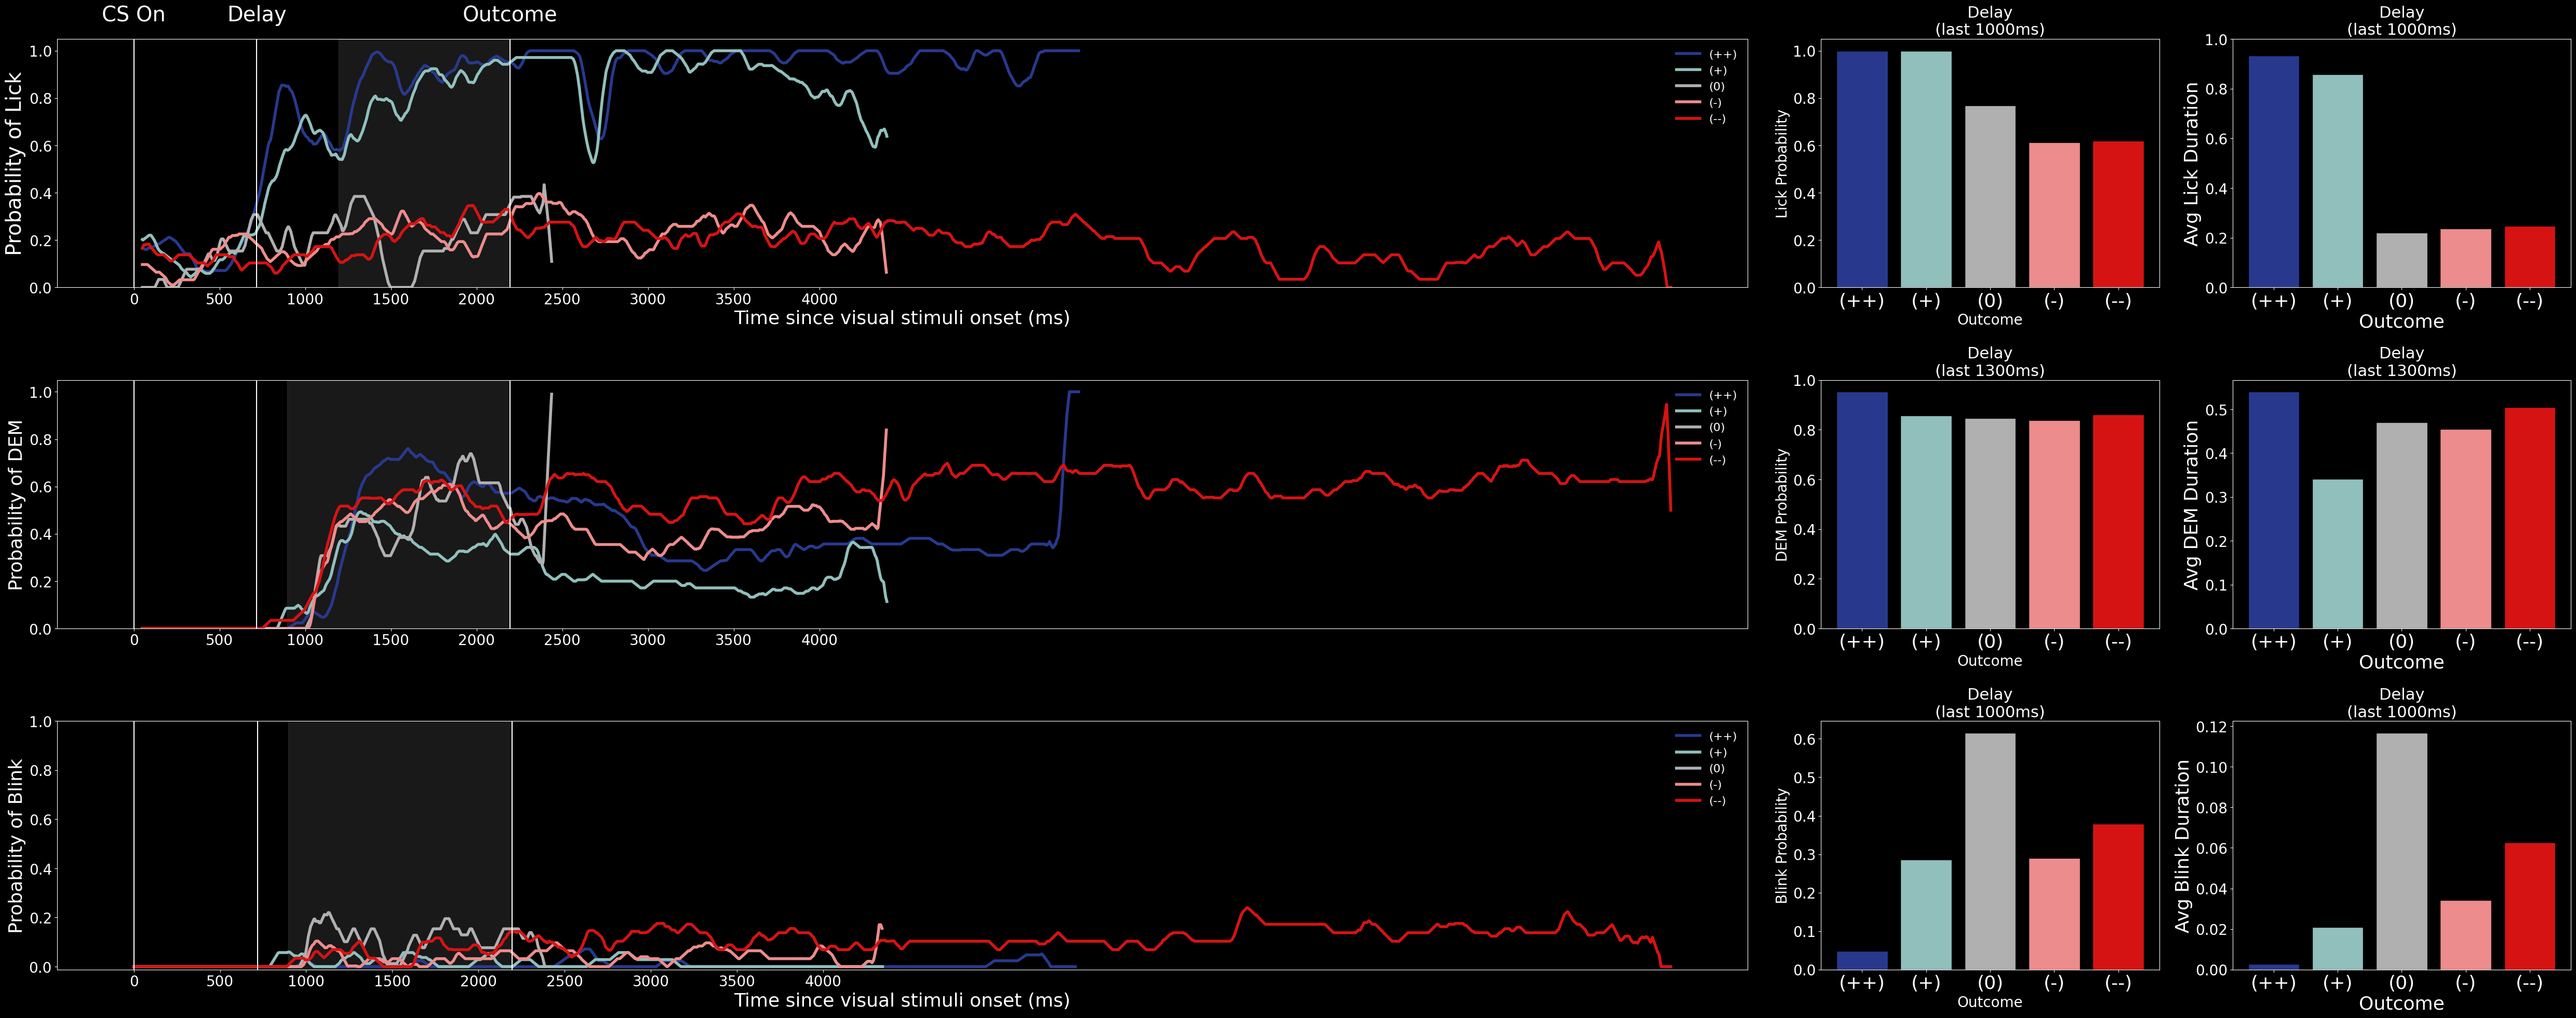

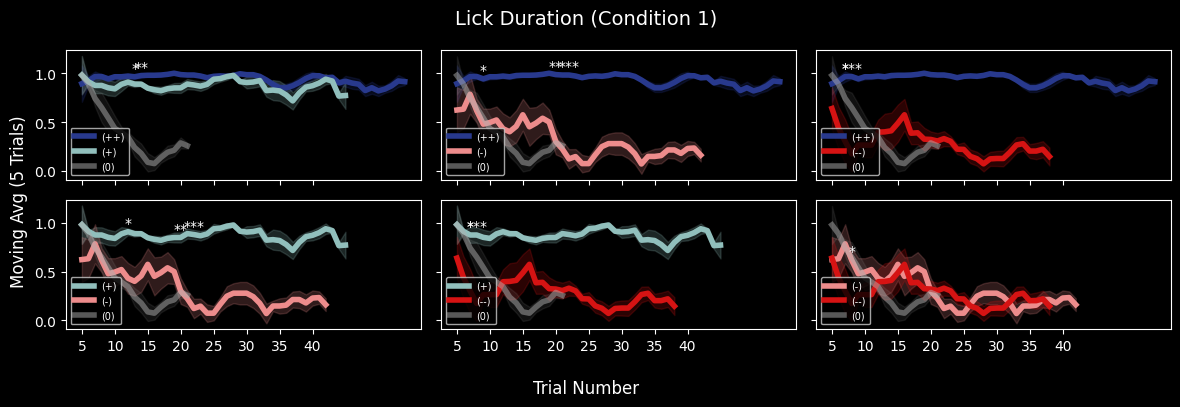

  t_test_DEM-duration_1.png saved.


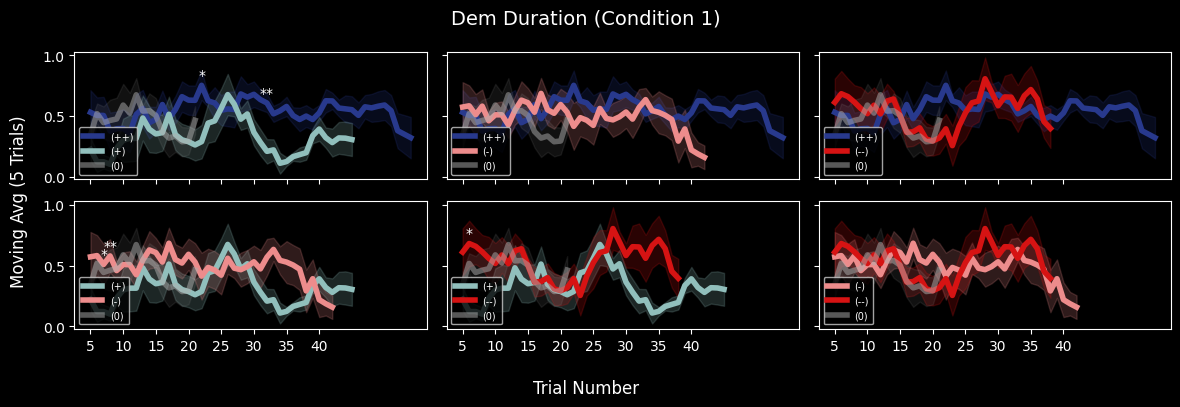

  t_test_blink-duration_1.png saved.


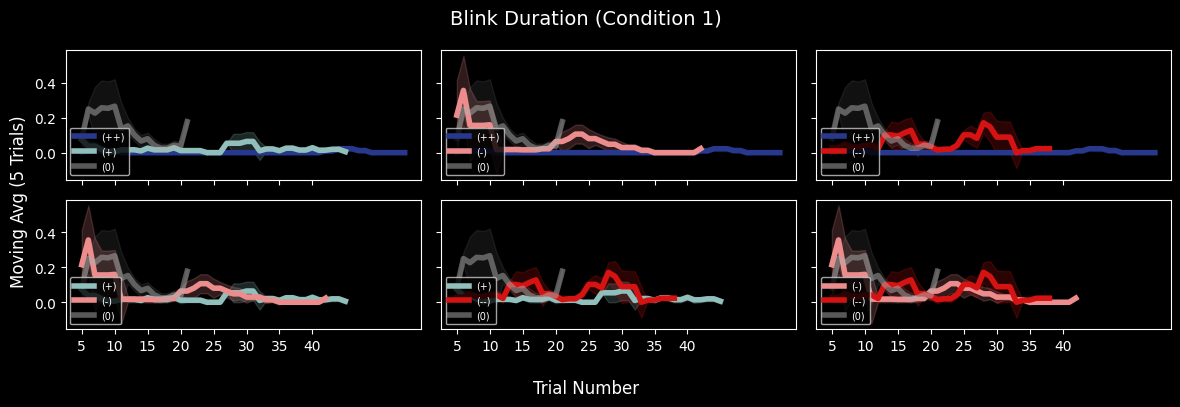

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


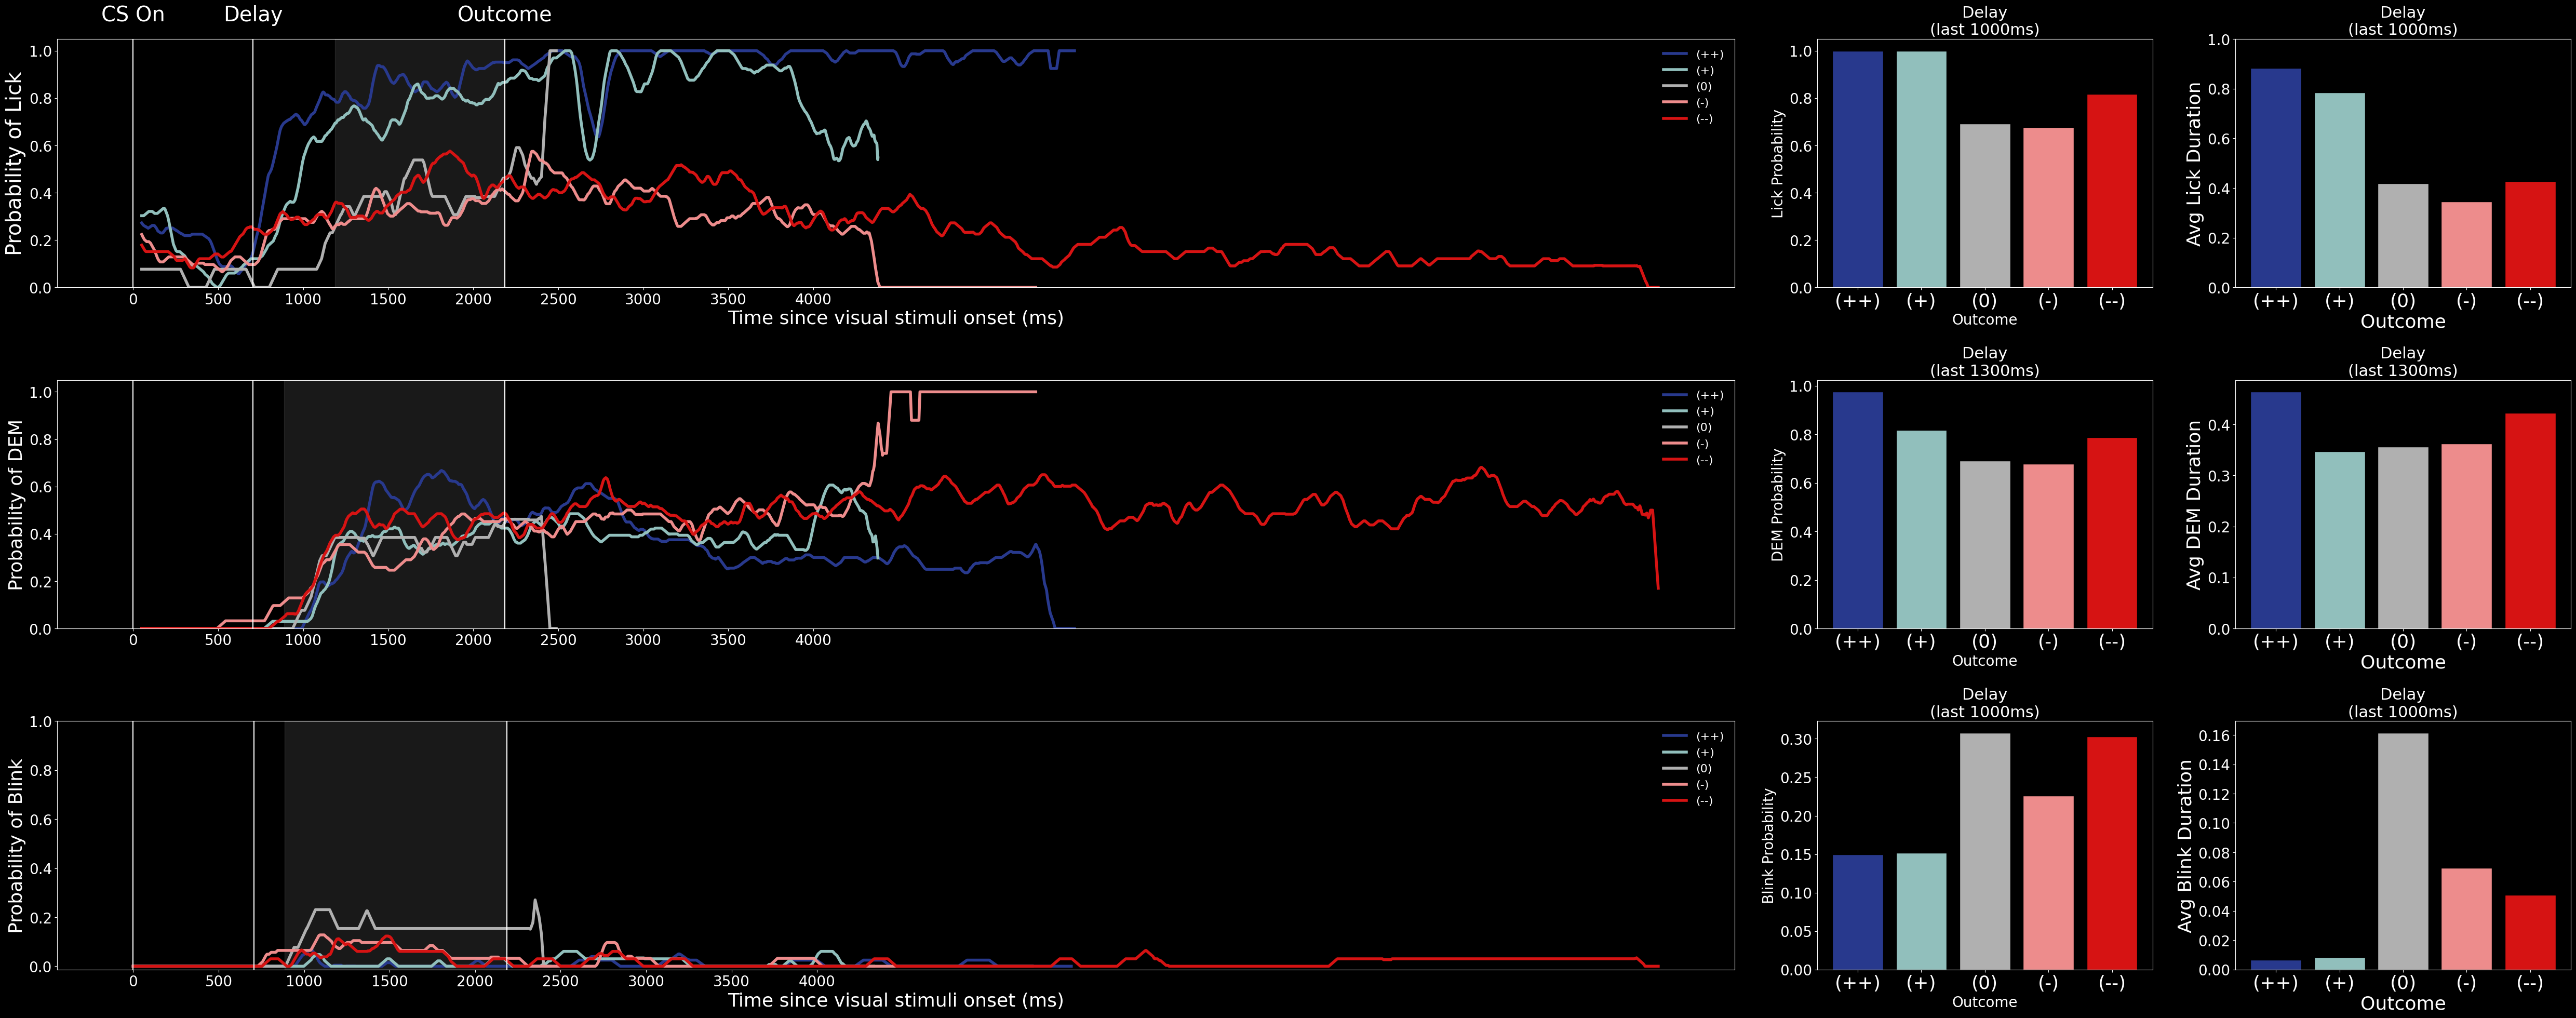

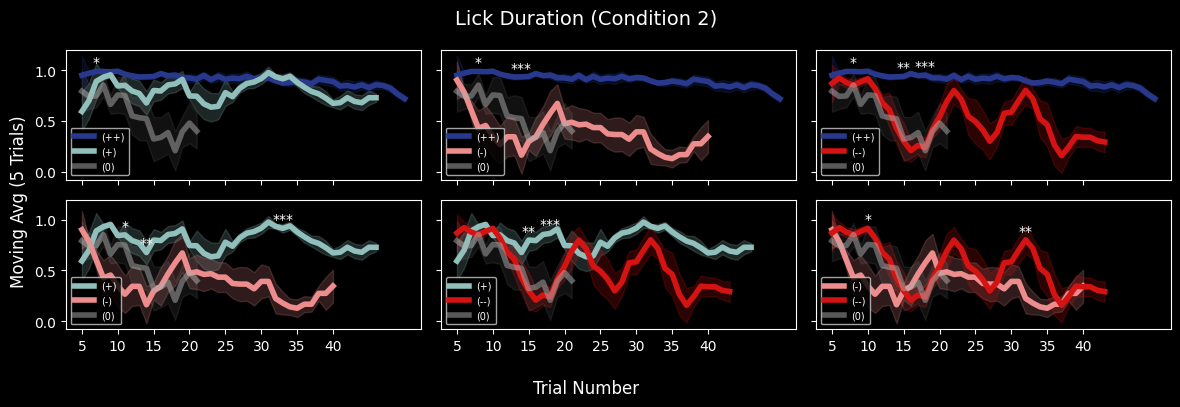

  t_test_DEM-duration_2.png saved.


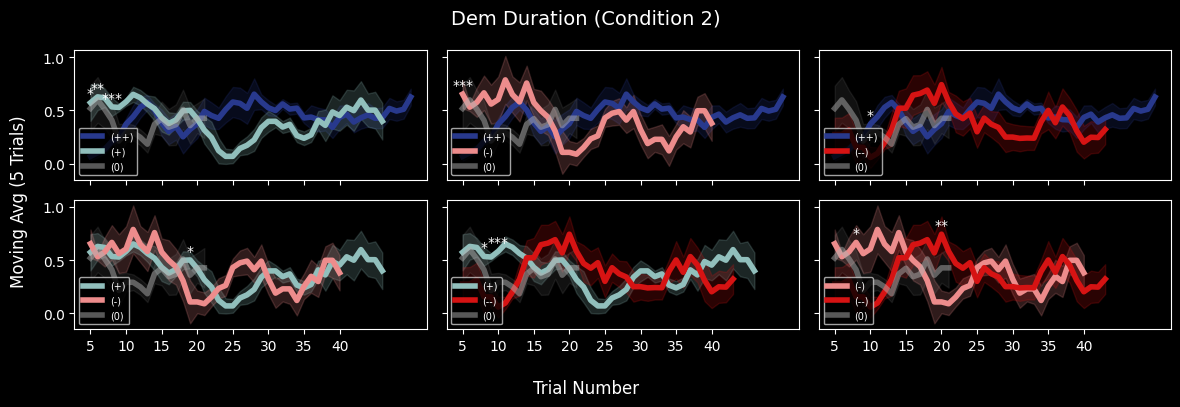

  t_test_blink-duration_2.png saved.


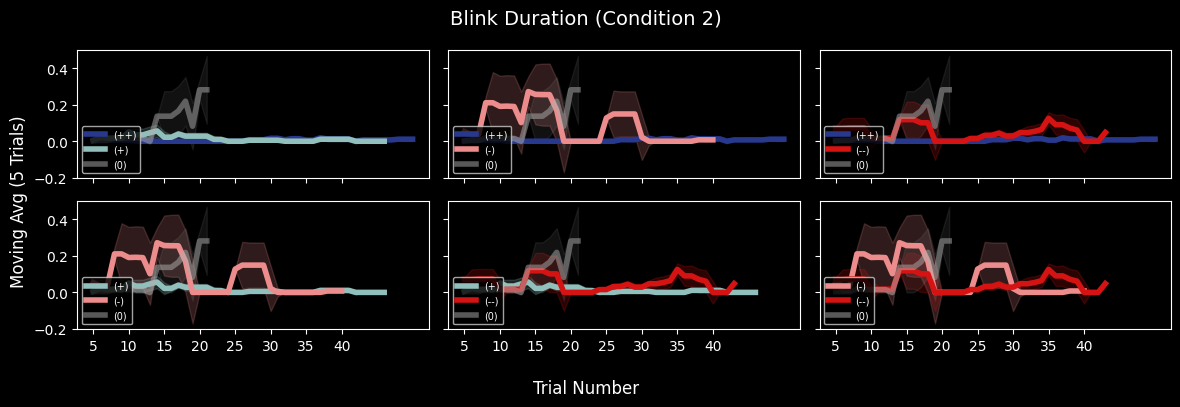

 [0.0, 0.5, 1.0] ANOVA 139.051 | P-value: 2.19E-38
  (0, 1) T-value: -13.223 P-value: 1.63E-26 |  Z-value: -11.17 P-value: 5.73E-29
    0 Lick Mean: 0.317 Lick Std: 0.292 Trials: 98
    1 Lick Mean: 0.823 Lick Std: 0.168 Trials: 49
  (0, 2) T-value: -17.108 P-value: 8.12E-36 |  Z-value: -13.606 P-value: 3.66E-42
    0 Lick Mean: 0.317 Lick Std: 0.292 Trials: 98
    2 Lick Mean: 0.887 Lick Std: 0.11 Trials: 53
  (1, 2) T-value: -2.216 P-value: 2.95E-02 |  Z-value: -2.252 P-value: 2.43E-02
    1 Lick Mean: 0.823 Lick Std: 0.168 Trials: 49
    2 Lick Mean: 0.887 Lick Std: 0.11 Trials: 53
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 1.113 | P-value: 3.31E-01
  (0, 1) T-value: 1.423 P-value: 1.60E-01 |  Z-value: 1.526 P-value: 1.27E-01
    0 DEM Mean: 0.433 DEM Std: 0.267 Trials: 111
    1 DEM Mean: 0.356 DEM Std: 0.311 Trials: 43
  (0, 2) T-value: 0.038 P-value: 9.70E-01 |  Z-value: 0.042 P-value: 9.67E-01
    0 DEM Mean: 0.433 DEM Std: 0.267 Trials: 111
    2 DEM Mean: 0.431 DEM Std: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.25, p_val: 3.70E-03
  (--) vs (0): ks_stat: 0.62, p_val: 2.34E-11
  (--) vs (+): ks_stat: 0.76, p_val: 1.02E-26
  (--) vs (++): ks_stat: 0.69, p_val: 1.93E-21
  (-) vs (0): ks_stat: 0.53, p_val: 5.65E-08
  (-) vs (+): ks_stat: 0.67, p_val: 5.87E-19
  (-) vs (++): ks_stat: 0.6, p_val: 3.86E-15
  (0) vs (+): ks_stat: 0.2, p_val: 1.84E-01
  (0) vs (++): ks_stat: 0.16, p_val: 4.15E-01
  (+) vs (++): ks_stat: 0.13, p_val: 4.50E-01
Blink
  (--) vs (-): ks_stat: 0.16, p_val: 1.64E-01
  (--) vs (0): ks_stat: 0.41, p_val: 5.06E-05
  (--) vs (+): ks_stat: 0.24, p_val: 6.75E-03
  (--) vs (++): ks_stat: 0.29, p_val: 5.12E-04
  (-) vs (0): ks_stat: 0.32, p_val: 4.34E-03
  (-) vs (+): ks_stat: 0.13, p_val: 3.75E-01
  (-) vs (++): ks_stat: 0.18, p_val: 1.07E-01
  (0) vs (+): ks_stat: 0.21, p_val: 1.45E-01
  (0) vs (++): ks_stat: 0.21, p_val: 1.47E-01
  (+) vs (++): ks_stat: 0.09, p_val: 8.61E-01
Total Eye Position

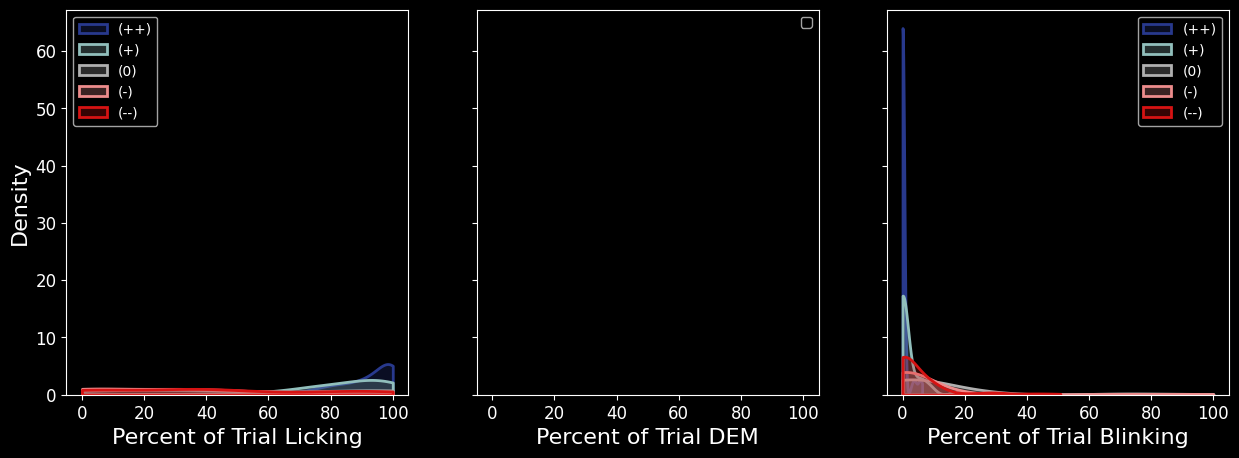

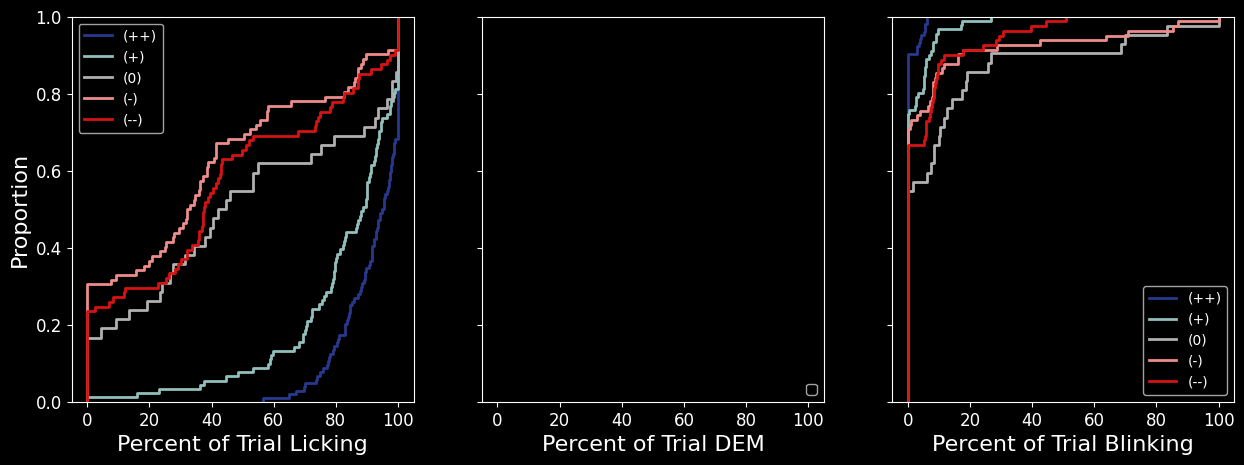

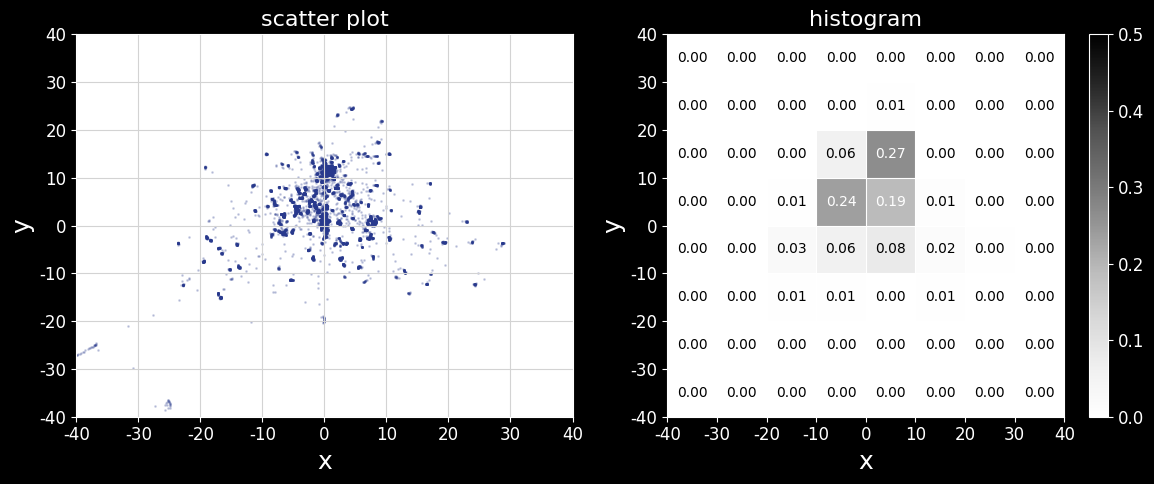

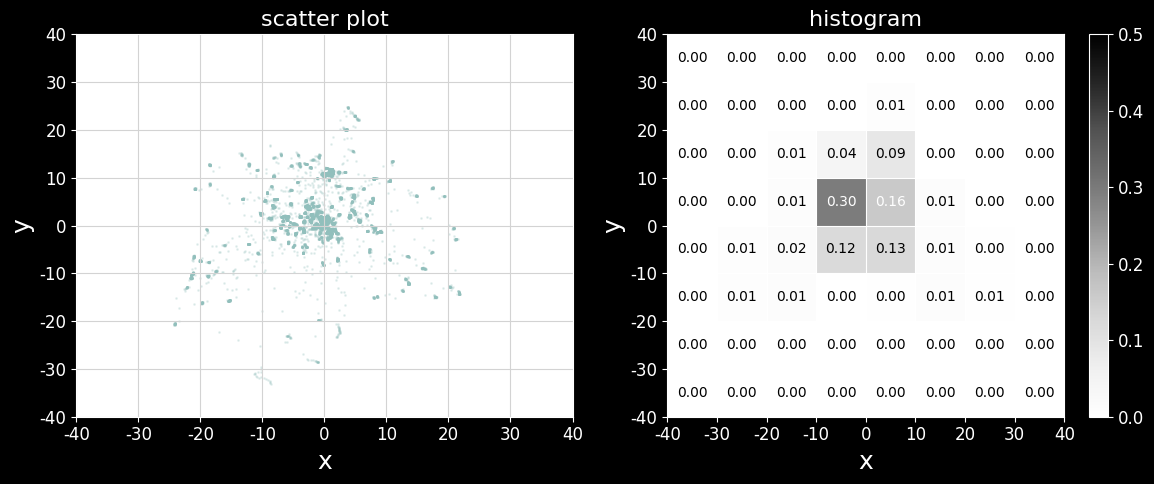

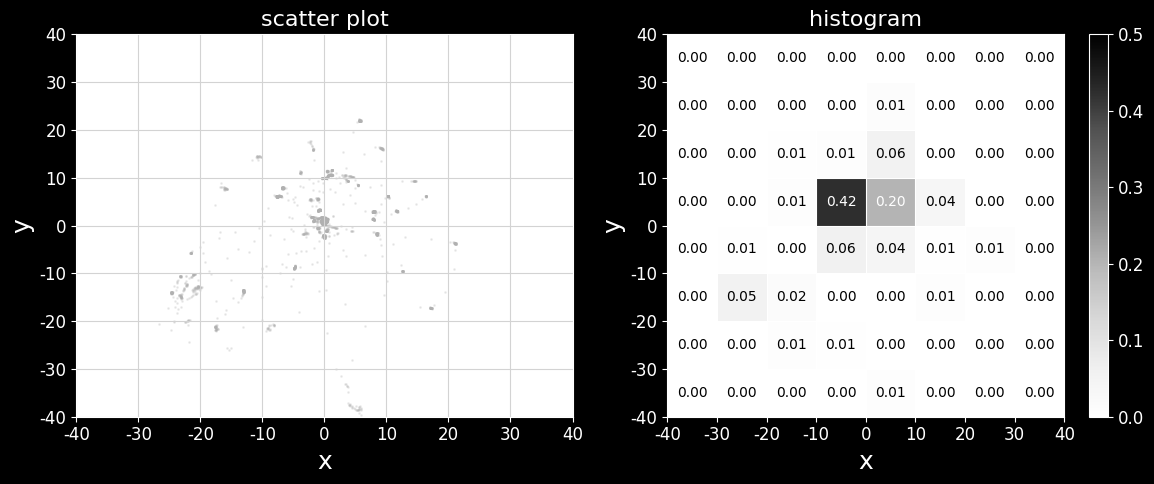

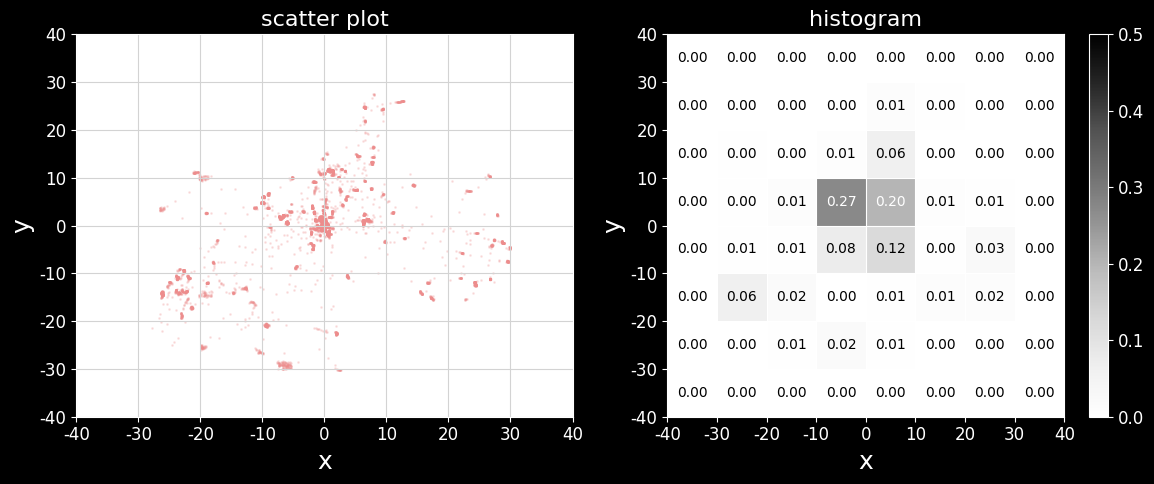

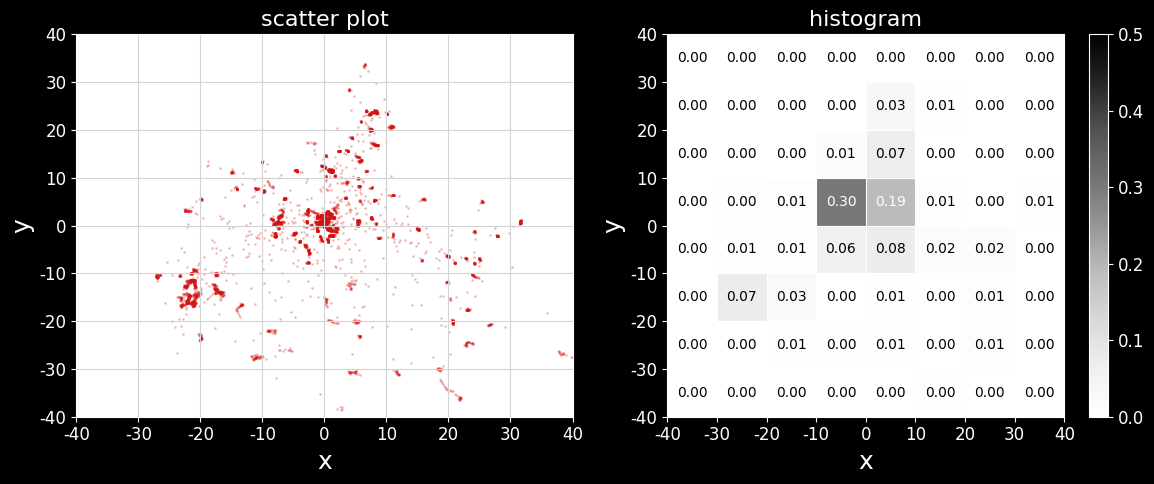

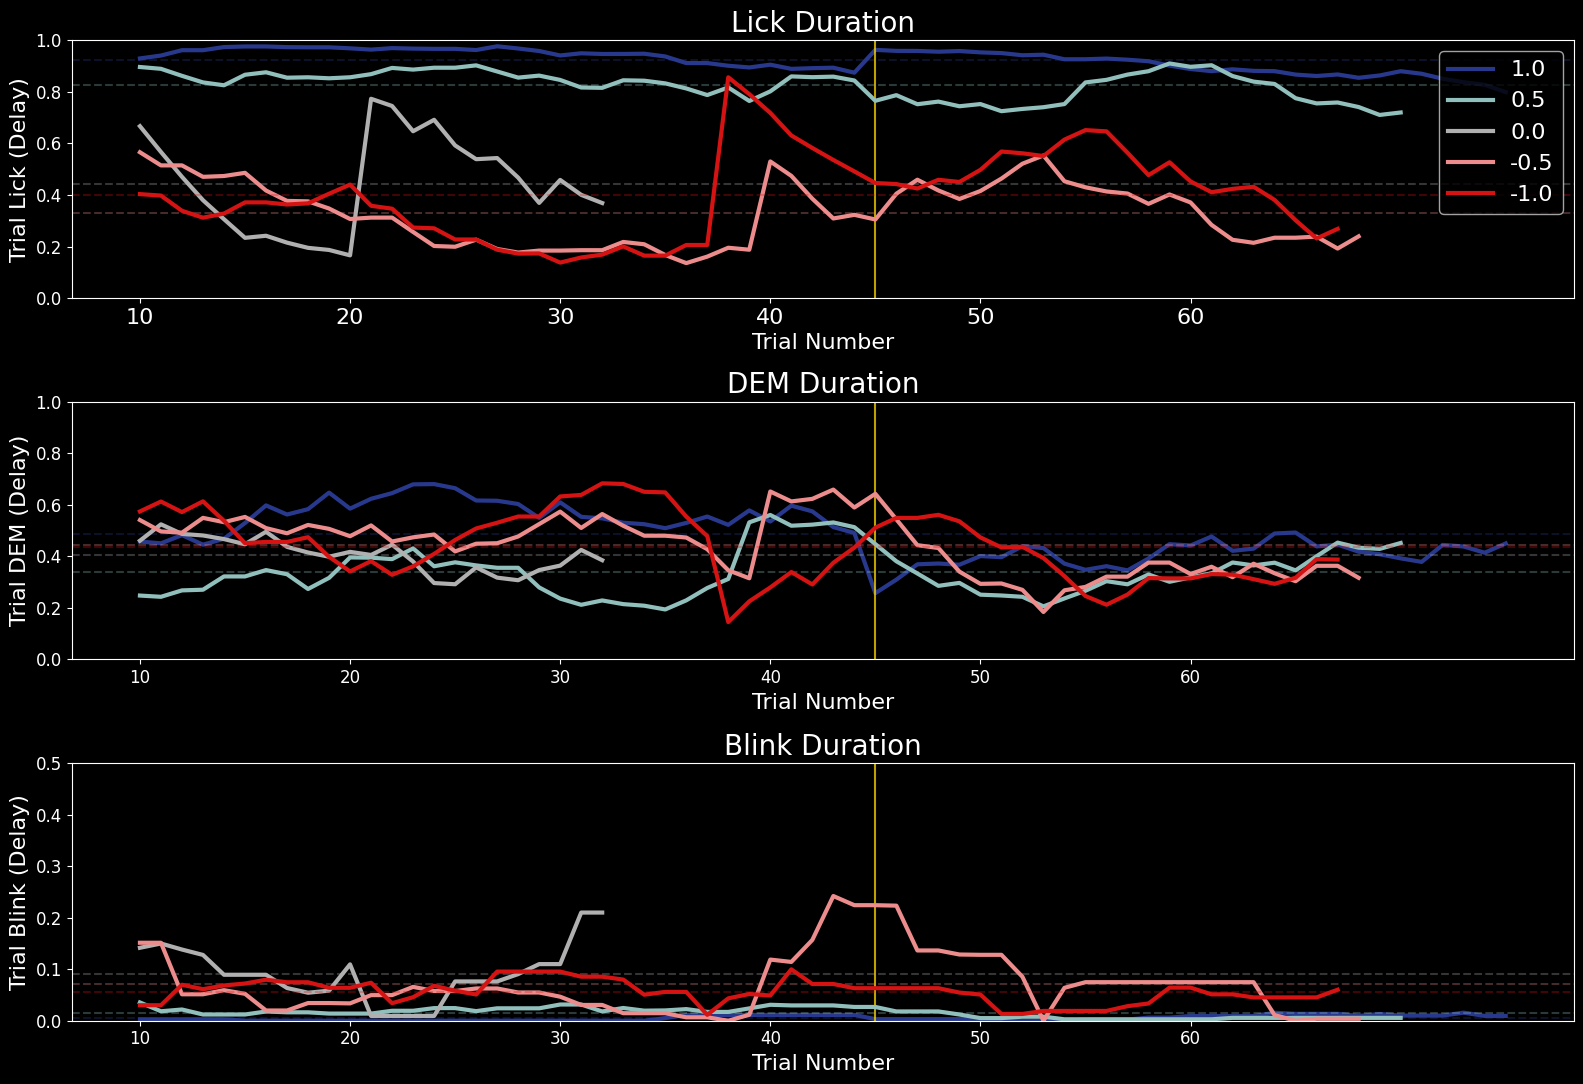

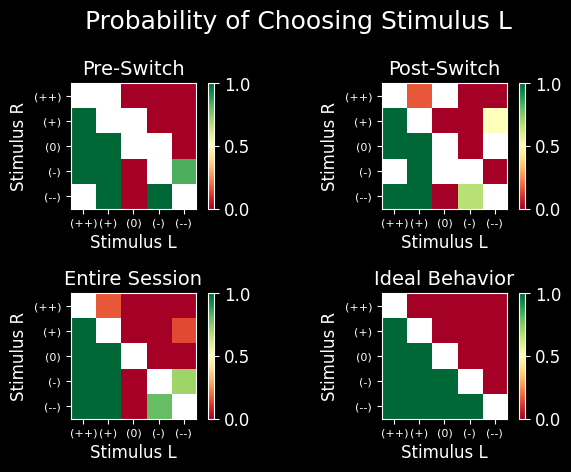

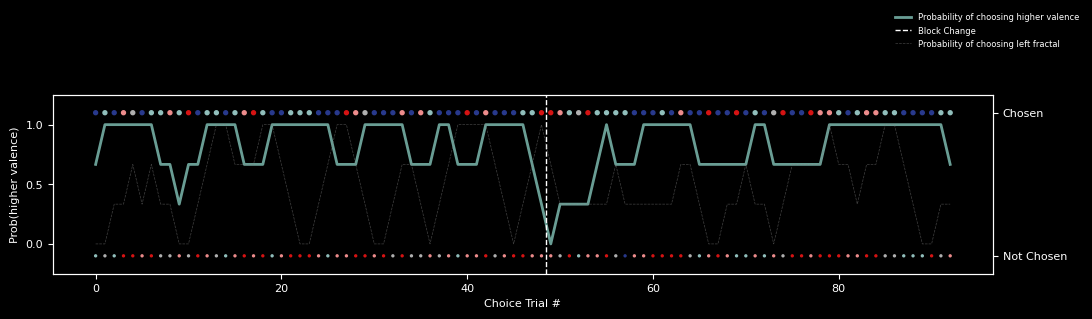

Reward vs. Airpuff Accuracy: 0.86 (+/- 0.22)
  lick_duration: 2.732
  blink_duration_offscreen: 0.461
  pupil_raster_window_avg: -0.521
  blink_duration_window: -0.717
  eye_distance: -0.015


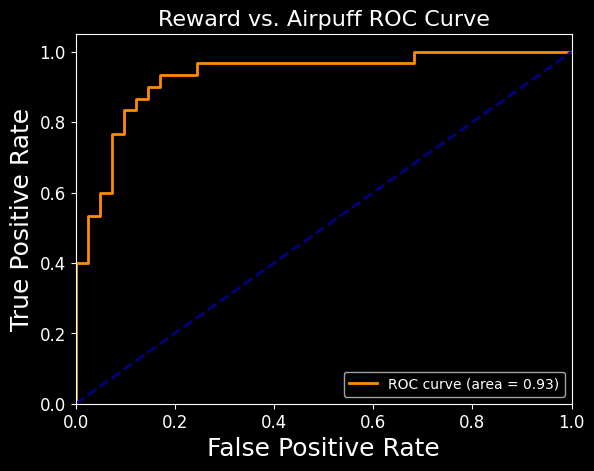

Large Reward vs. Small Reward Accuracy: 0.67 (+/- 0.30)
  lick_duration: 0.031
  blink_duration_offscreen: 0.56
  pupil_raster_window_avg: -0.004
  blink_duration_window: -0.005
  eye_distance: -0.038


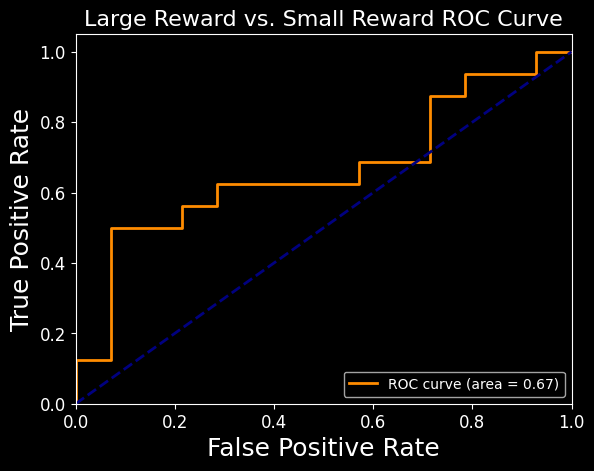

Large Airpuff vs. Small Airpuff Accuracy: 0.60 (+/- 0.13)
  lick_duration: 0.189
  blink_duration_offscreen: -0.096
  pupil_raster_window_avg: -0.035
  blink_duration_window: -0.031
  eye_distance: 0.008


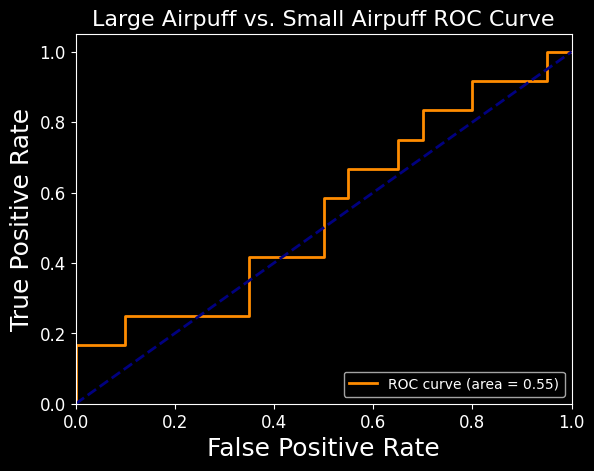


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20231102_aragorn.md
Writing to excel...


In [5]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [6]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.819 (307/375)
   Valence 1.0: 0.943 (66/70)
   Valence 0.5: 0.79 (64/81)
   Valence 0.0: 0.809 (38/47)
   Valence -0.5: 0.802 (69/86)
   Valence -1.0: 0.769 (70/91)
 Percent successful choice trials: 0.66 (93/141)
   Valence Pair [-1.0, 1.0]: 1.0 (9/9)
   Valence Pair [0.5, 1.0]: 0.812 (13/16)
   Valence Pair [0.0, 0.5]: 0.8 (8/10)
   Valence Pair [-1.0, 0.0]: 0.8 (4/5)
   Valence Pair [-0.5, 1.0]: 0.706 (12/17)
   Valence Pair [-0.5, 0.5]: 0.692 (9/13)
   Valence Pair [-1.0, 0.5]: 0.688 (11/16)
   Valence Pair [0.0, 1.0]: 0.625 (5/8)
   Valence Pair [-0.5, 0.0]: 0.571 (4/7)
   Valence Pair [-1.0, -0.5]: 0.45 (18/40)
 Percent left choice trials: 0.484 (45/93)
 Percent higher valence choice trials: 0.828 (77/93)
   Valence Pair [-0.5, 1.0]: 1.0 (12/12)
   Valence Pair [-0.5, 0.5]: 1.0 (9/9)
   Valence Pair [-1.0, 1.0]: 1.0 (9/9)
   Valence Pair [0.0, 1.0]: 1.0 (5/5)
   Valence Pair [0.5, 1.0]: 0.923 (12/13)
   Valence Pair 

In [10]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.872197                  0.514359                 0.092657  \
-0.5          0.813984                  0.476813                 0.087314   
 0.0          0.803029                  0.594118                 0.117964   
 0.5          0.958574                  0.293971                 0.030317   
 1.0          0.998323                  0.511964                 0.045290   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.133345     71.782175  
-0.5                  0.138413     75.460576  
 0.0                  0.157579     64.083207  
 0.5                  0.071934     69.556981  
 1.0                  0.065834     50.352084

In [11]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
11       1       -1.0       -0.5     -0.5               1
12       1        0.5       -0.5      0.5               1
17       1        0.0        0.5      0.5               1
21       1        0.5       -1.0      0.5               1
25       1       -0.5       -1.0     -0.5               1
30       1        0.5        1.0      1.0               1
34       1        0.5        1.0      1.0               1
38       1       -0.5        0.5     -0.5               0
41       1       -0.5       -1.0     -1.0               0
44       1        0.0        0.5      0.5               1
53       1        0.5       -1.0     -1.0               0
54       1       -1.0       -0.5     -1.0               0
58       1       -1.0        0.5      0.5               1
59       1       -0.5       -1.0     -0.5               1
60       1       -1.0        1.0      1.0               1
68       1       -0.5       -1.0     -1.0               0
78       1       -1.0        0.0     -1.0               0
81       1       -1.0        1.0      1.0               1
91       1        1.0        0.5      1.0               1
98       1        0.5        1.0      1.0               1
104      1       -0.5        0.0      0.0               1
106      1        1.0        0.0      1.0               1
113      1       -1.0        0.0     -1.0               0
116      1       -0.5       -1.0     -0.5               1
125      1        0.5        1.0      1.0               1
138      1        1.0       -1.0      1.0               1
139      1       -0.5        0.0      0.0               1
141      1        1.0        0.5      1.0               1
143      1        0.5        1.0      1.0               1
159      1       -0.5        0.0      0.0               1
164      1        1.0        0.5      1.0               1
167      1        1.0        0.5      1.0               1
175      1        0.5        0.0      0.5               1
178      1       -0.5       -1.0     -1.0               0
186      1       -1.0        0.5      0.5               1
187      1        0.5        1.0      1.0               1
201      1        0.0        0.5      0.5               1
207      1       -1.0       -0.5     -0.5               1
208      1        0.5        0.0      0.5               1
209      1       -1.0        0.0      0.0               1
219      1        1.0        0.5      1.0               1
223      1        1.0       -0.5      1.0               1
225      1       -1.0        1.0      1.0               1
226      1        1.0        0.5      1.0               1
241      1       -1.0        0.0     -1.0               0
242      1        0.5        0.0      0.5               1
243      1        1.0       -1.0      1.0               1
248      1       -1.0        1.0      1.0               1
251      1        0.5        1.0      1.0               1
254      1        0.5       -0.5      0.5               1
259      1       -0.5        1.0      1.0               1
262      1        1.0       -0.5      1.0               1
265      1       -0.5        0.5      0.5               1
273      1        1.0        0.0      1.0               1
275      1        0.0       -0.5      0.0               1
278      2       -0.5       -1.0     -0.5               1
286      2        0.5        0.0      0.0               0
289      2       -1.0        0.5     -1.0               0
295      2       -0.5        1.0      1.0               1
305      2       -0.5       -1.0     -1.0               0
308      2       -0.5       -1.0     -1.0               0
310      2        1.0        0.0      1.0               1
312      2        1.0        0.5      1.0               1
329      2       -0.5       -1.0     -1.0               0
338      2        0.0        0.5      0.5               1
344      2       -1.0        0.5      0.5               1
346      2        0.0        1.0      1.0               1
354      2        1.0        0.5      1.0               1
357

In [10]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               18.571429       0.735714  \
          _fractal_B          0.5               22.468750       0.700906   
          _fractal_C         -0.5               21.848485       0.648364   
          _fractal_D         -1.0               22.793103       0.638207   
          _fractal_E          0.0               10.428571       0.733571   
2         _fractal_A         -0.5               26.742857       0.544200   
          _fractal_B         -1.0               20.424242       0.621727   
          _fractal_C          1.0               27.131579       0.715447   
          _fractal_D          0.5               21.710526       0.700026   
          _fractal_E          0.0               10.470588       0.560471   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.505440                 0.000000  \
          _fractal_B                      0.571442                 0.004423   
          _fractal_C                      0.646224                 0.018438   
          _fractal_D                      0.677082                 0.057745   
          _fractal_E                      0.633132                 0.031538   
2         _fractal_A                      0.705560                 0.025099   
          _fractal_B                      0.692797                 0.022937   
          _fractal_C                      0.606903                 0.002024   
          _fractal_D                      0.599413                 0.000749   
          _fractal_E                      0.732760                 0.020045   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.000000    105.440940  
          _fractal_B                   0.016995    140.463855  
          _fractal_C                   0.070606    171.050488  
          _fractal_D                   0.121724    223.525084  
          _fractal_E                   0.091099    198.956141  
2         _fractal_A                   0.069407    190.057751  
          _fractal_B                   0.060839    190.519398  
          _fractal_C                   0.011964    134.766998  
          _fractal_D                   0.004474    104.952688  
          _fractal_E                   0.068416    183.936939

### Behavioral Summary Panels by Valence

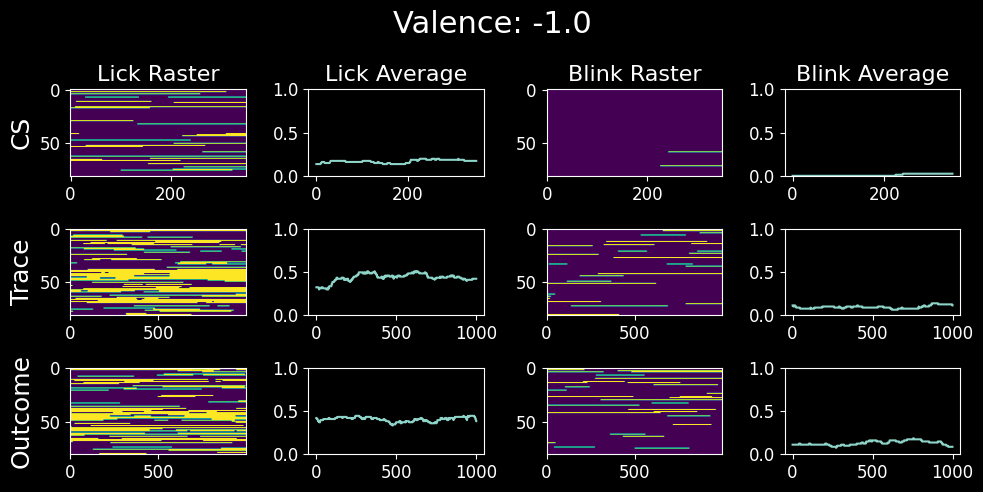

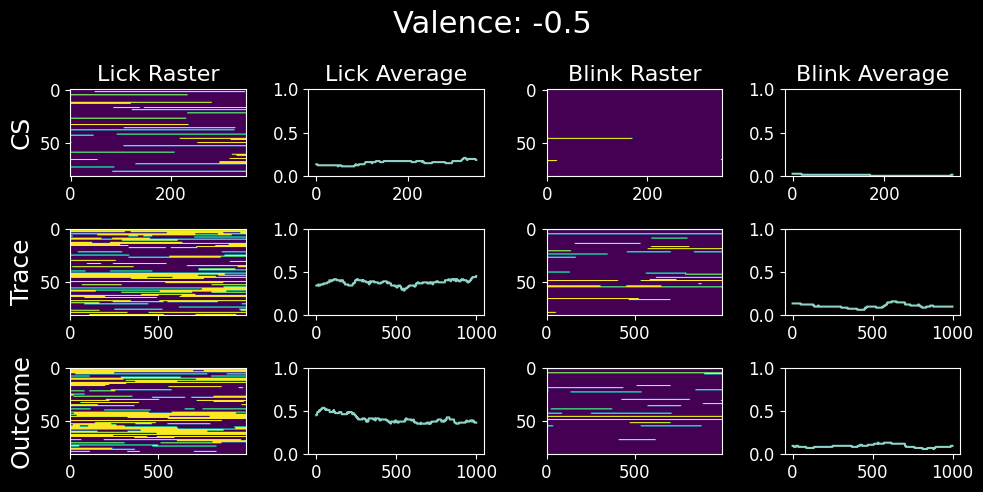

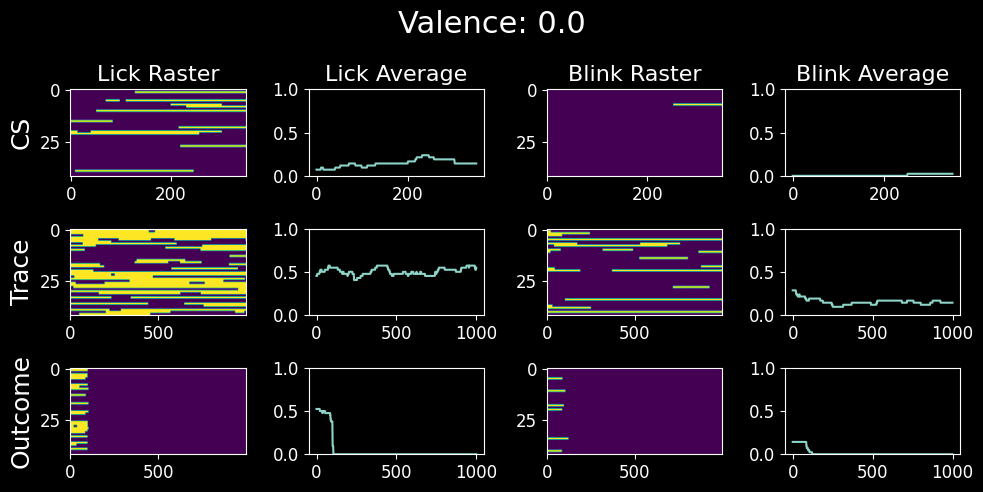

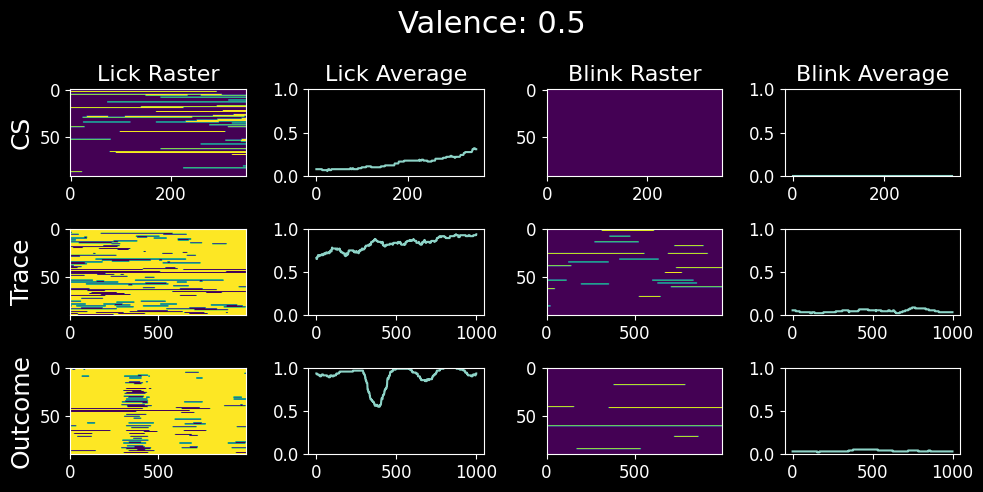

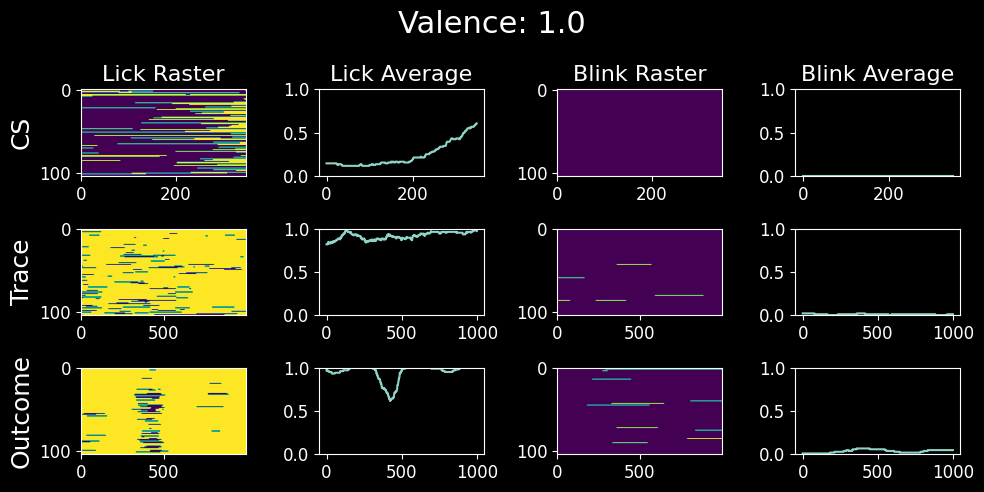

In [7]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [8]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 30) &
											 (session_df_correct['lick_duration'] > 0.8)]\
			[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
5    231102          6      0.5          1.000                  0.000000  \
13   231102         14      1.0          1.000                  0.810000   
18   231102         19     -0.5          1.000                  0.000000   
23   231102         24      1.0          0.954                  0.000000   
29   231102         30     -0.5          0.968                  0.755385   
41   231102         42     -0.5          0.871                  0.708462   
45   231102         46      1.0          0.880                  0.906154   
49   231102         50      0.5          0.813                  0.000000   
54   231102         55      0.5          1.000                  0.000000   
63   231102         64      0.5          0.924                  0.000000   
68   231102         69      0.5          0.899                  0.839231   
99   231102        100      0.5          1.000                  0.000000   
100  231102        101      1.0          1.000                  0.786154   
115  231102        116      1.0          1.000                  0.849231   
117  231102        118      0.5          0.944                  0.000000   
121  231102        122      0.5          0.823                  0.890769   
127  231102        128      1.0          0.930                  0.552308   
129  231102        130      1.0          0.979                  0.767692   
130  231102        131      1.0          1.000                  0.803846   
131  231102        132      1.0          0.948                  0.146154   
141  231102        142      0.5          0.975                  0.564615   
148  231102        149      1.0          0.915                  0.760000   
155  231102        156      1.0          0.981                  0.780769   
170  231102        171      1.0          1.000                  0.626923   
180  231102        181      1.0          0.954                  0.372308   
212  231102        213      1.0          0.982                  0.610769   
241  231102        242      0.5          0.929                  0.000000   
247  231102        248      0.5          0.896                  0.007692   
249  231102        250      1.0          0.838                  0.840769   
252  231102        253      1.0          1.000                  0.260000   
257  231102        258      1.0          1.000                  0.000000   
262  231102        263      1.0          0.924                  0.000000   
284  231102        285      0.0          1.000                  0.000000   
287  231102        288     -1.0          1.000                  0.084615   
288  231102        289      0.0          0.980                  0.783077   
301  231102        302     -1.0          1.000                  0.804615   
320  231102        321      1.0          0.896                  0.000000   
323  231102        324      1.0          0.917                  0.000000   
327  231102        328     -1.0          1.000                  0.000000   
332  231102        333     -0.5          1.000                  0.110769   
340  231102        341      1.0          1.000                  0.000000   
343  231102        344      0.5          1.000                  0.468462   
348  231102        349     -1.0          0.873                  0.000000   
350  231102        351     -1.0          0.913                  0.000000   
370  231102        371      1.0          0.857                  0.523077   
384  231102        385     -0.5          1.000                  0.000000   
391  231102        392     -0.5          1.000                  0.000769   
439  231102        440     -1.0          0.827                  0.000000   
452  231102        453      0.5          0.900                  0.000000   
474  231102        475      1.0          0.976                  0.507692   
480  231102        481      0.5          0.801                  0.000000   
492  231102        493      0.5          0.833         

### High DEM + Blink + Eye Movement / Low Lick Trials

In [52]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.25) &
											 (session_df_correct['eye_distance'] > 200) & 
											 (session_df_correct['lick_duration'] < 0.75)]\
		[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
336  231020        337     -1.0          0.500                  0.623846  \
492  231020        493     -1.0          0.474                  0.260769   

     eye_distance  
336    265.434075  
492    556.544455

In [13]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.107
Lick vs. Blink Correlation 0.007
DEM vs. Blink Correlation 0.318
Pupil 0 vs. Blink Correlation 0.949


***
### Video Test

In [31]:
trial_specified = 27
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
26                    0     -0.5     _fractal_C         0.0          0.5  \

    lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
26          0.499                  0.118462                      0.0  \

    blink_duration_window  
26                    0.0

***
## Single Trial Analysis

In [33]:
trial_selected = 15
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
14        1      1.0           0.85            0.342308  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
14                  0.586923                 0.342308               0.521538  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
14     92.016822          4543           4550            <NA>

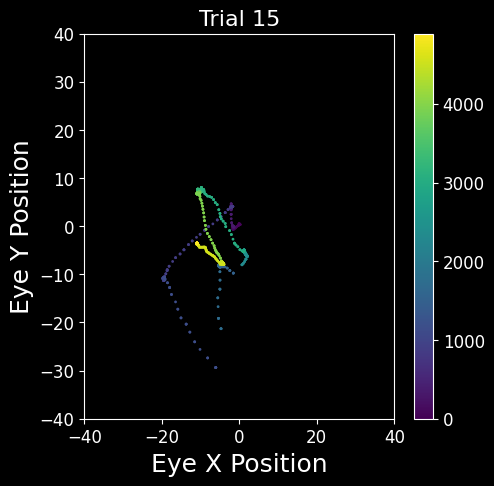

In [34]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1055
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0095 0.0104 0.2085 0.49   0.     0.     0.    ]
 [0.     0.0076 0.2512 0.0227 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 30.14%
outside x,y [-40, 40]: 29.67%
  eye_heatmap_1.0.png saved.


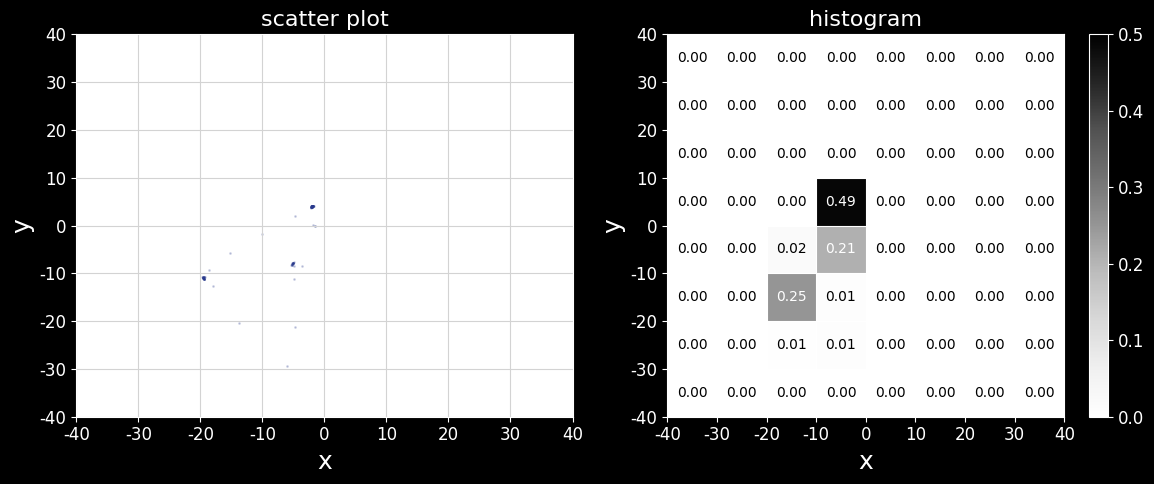

In [35]:
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [100]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': True}

parse_wm_videos(**kwargs)

Parsing Trials for Videos: 0 - 1176
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 0    | Frames: 368-547
  Video complete: Cam: e3v8360 | Trial: 227  | Frames: 9066-9245
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 65   | Frames: 46190-46367
  Video complete: Cam: e3v8360 | Trial: 257  | Frames: 32736-32915
  Video complete: Cam: e3v8360 | Trial: 3    | Frames: 3533-3711
  Video complete: Cam: e3v8360 | Trial: 1    | Frames: 1529-1706
  Video complete: Cam: e3v8360 | Trial: 215  | Frames: 25-203
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 427  | Frames: 4125-4303
  Video complete: Cam: e3v8360 | Trial: 97   | Frames: 67457-67636
  Video complete: Cam: e3v8360 | Trial: 118  | Frames: 81274-81452
  Video complete: Cam: e3v8360 | Trial: 641  | Frames: 808-987
  Video complete: Cam: e3v8360 | Trial

## Generate MonkeyLogic Behavior Trial Videos


In [19]:
from config.ml_videos import generate_ml_behavior_videos
trial_selected = 27 
generate_ml_behavior_videos(session_df, session_obj, trial_selected)

Generating video for trial 27
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/eye_0027.mp4


Trial 27 eye:   0%|          | 0/1507 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/lick_0027.mp4


Trial 27 lick:   0%|          | 0/1507 [00:00<?, ?it/s]

***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
   video_path_list = dlc_video_path_dict[key]
   video_list_subset = video_path_list[:]
   config_path = config_path_dict[key]
   # Adding new videos to the config.yaml file
   deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
               coords=None, extract_frames=False
   )

   # Analyze specified videos
   deeplabcut.analyze_videos(config_path, video_list_subset, 
               videotype, save_as_csv=True
   )

   # Filter predictions
   deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

   # Create labeled videos
   deeplabcut.create_labeled_video(
      config_path, video_list_subset, 
      videotype, 
      draw_skeleton=True, 
      filtered=True,
      trailpoints=5,
   )

   # Plot trajectories
   deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
  dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')